In [1]:
import pandas as pd
import plotly.express as px

## Row Data, without applying Normalisation and removing Outliers

### csv uploads

In [10]:
mysportsbetting=pd.read_csv("Data\mysportsbetting.csv")                  
mysportsbetting.head(2)

FileNotFoundError: [Errno 2] No such file or directory: 'Data\\mysportsbetting.csv'

### Correlation overview

In [ ]:
px.imshow(mysportsbetting.corr("spearman").round(2), text_auto=True, title="Spearman Correlation between numerical variables", 
          template="plotly_dark", color_continuous_scale="RdBu_r", width=900, height=600)

C:\Users\mayin\AppData\Local\Temp\ipykernel_14824\1574180648.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
 
selected_columns = mysportsbetting[["Winnings", "Wager", "Purchase_Time_encoded", "Sport_Group_encoded"]]       #Selected columns for the model from mysportsbetting 
 
X = selected_columns.drop(columns=["Winnings"])                                                                 #Winnings is the object variable and will be "y"
y = selected_columns["Winnings"]                         
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)                       #Division between train(80%) and test(20%)
 
scaler = StandardScaler()                                                                                       #Scaler for models Ridge, Lasso, ElasticNet and PolinomialFeatures
scaler.fit(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
models = [                                                                                                      #Models list to apply, with scaler when needed
    make_pipeline(StandardScaler(), SVR()),
    make_pipeline(StandardScaler(), Ridge()),
    make_pipeline(StandardScaler(), Lasso()),
    make_pipeline(StandardScaler(), ElasticNet()),
    RandomForestRegressor(),
    GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=5),
    make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
]
 
model_names = []                                                                                               #Initializa empty list for different results
mse_values = []
r2_values = []
 
for model in models:                                                                                           #Train and evaluate models from the list
    model.fit(X_train_scaled, y_train)                                                                             #Adjust the model
    y_pred = model.predict(X_test_scaled)                                                                          #Predictions
    mse = mean_squared_error(y_test, y_pred)                                                                       #Calculate squared error   
    r2 = r2_score(y_test, y_pred)                                                                                  #Calculate coefficient of determination
 
    model_names.append(type(model).__name__)                                                                  # Add results to their corresponding lists
    mse_values.append(mse)
    r2_values.append(r2)
 
    print(f"Model: {model.steps[-1][1].__class__.__name__}" if hasattr(model, 'steps') else f"Model: {type(model).__name__}")        #Print results
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")
    print()


Model: SVR
Mean Squared Error (MSE): 38779.57157139678
R^2 Score: -0.017164726748259085

Model: Ridge
Mean Squared Error (MSE): 33468.859751406664
R^2 Score: 0.12213203487979696

Model: Lasso
Mean Squared Error (MSE): 33633.629156963514
R^2 Score: 0.11781023294675752

Model: ElasticNet
Mean Squared Error (MSE): 34939.17019594961
R^2 Score: 0.08356668046877169

Model: RandomForestRegressor
Mean Squared Error (MSE): 63789.89683539635
R^2 Score: -0.6731704439905062

Model: GradientBoostingRegressor
Mean Squared Error (MSE): 26767.63210218512
R^2 Score: 0.2979011863813539

Model: LinearRegression
Mean Squared Error (MSE): 30418.194626776836
R^2 Score: 0.20214913749738472



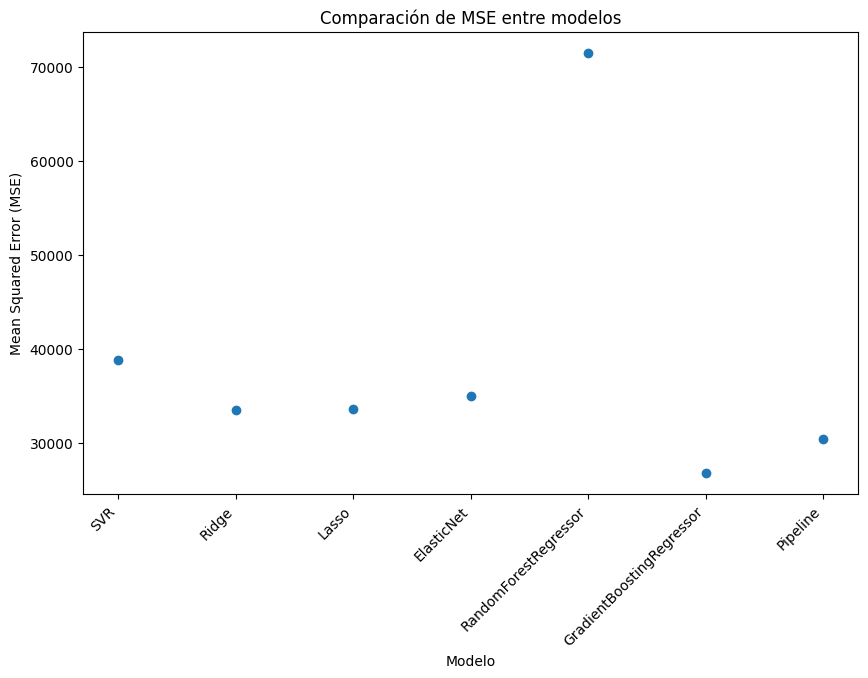

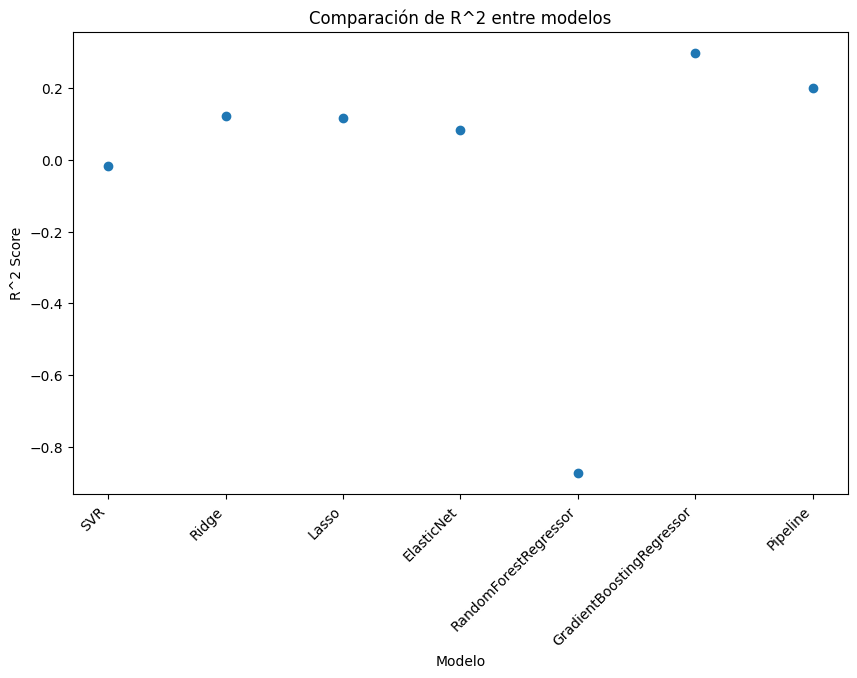

In [ ]:
import matplotlib.pyplot as plt

# Gráfico para Mean Squared Error (MSE)
plt.figure(figsize=(10, 6))
plt.scatter(model_names, mse_values)
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Modelo')
plt.title('Comparación de MSE entre modelos')
plt.xticks(rotation=45, ha='right')
plt.show()

# Gráfico para R^2 Score
plt.figure(figsize=(10, 6))
plt.scatter(model_names, r2_values)
plt.ylabel('R^2 Score')
plt.xlabel('Modelo')
plt.title('Comparación de R^2 entre modelos')
plt.xticks(rotation=45, ha='right')
plt.show()

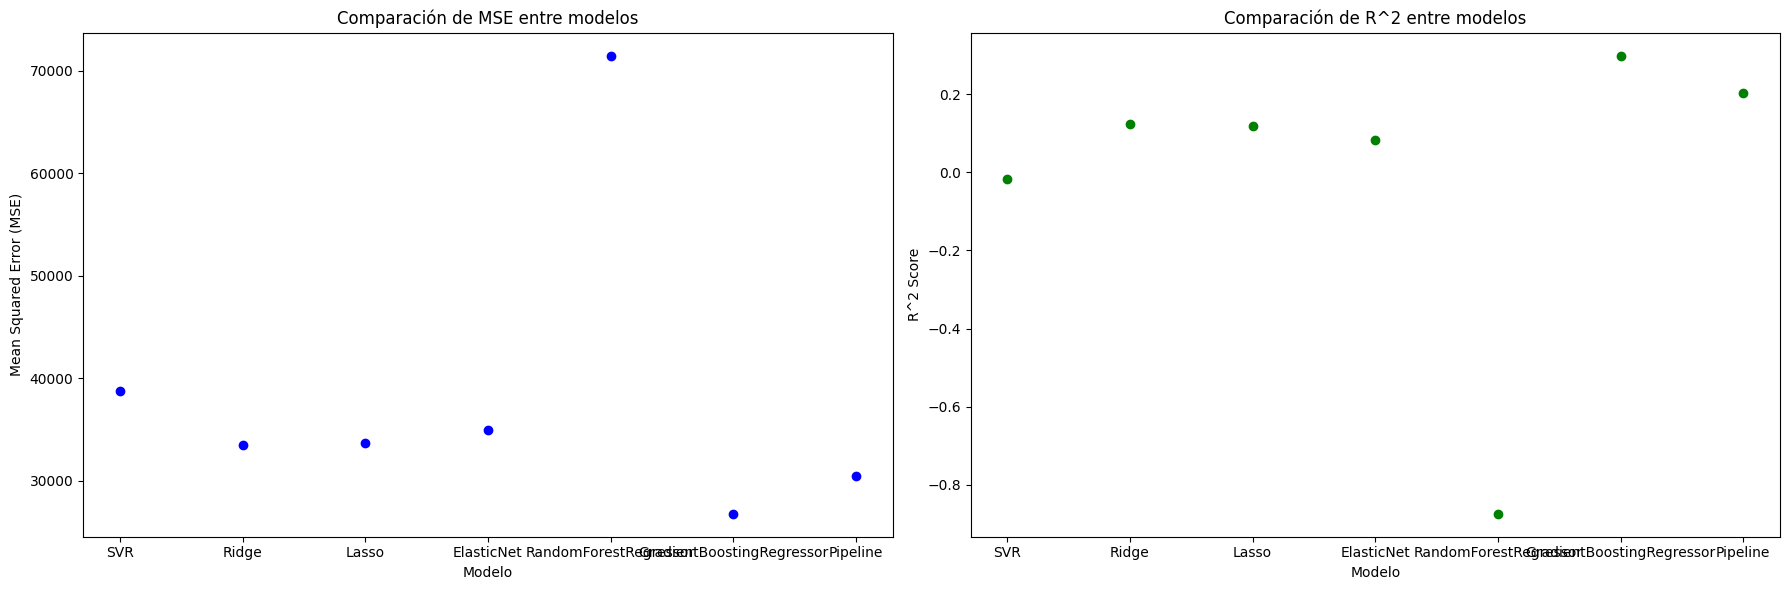

In [ ]:
import matplotlib.pyplot as plt

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico para Mean Squared Error (MSE)
axs[0].scatter(model_names, mse_values, color='blue')
axs[0].set_ylabel('Mean Squared Error (MSE)')
axs[0].set_xlabel('Modelo')
axs[0].set_title('Comparación de MSE entre modelos')


# Gráfico para R^2 Score
axs[1].scatter(model_names, r2_values, color='green')
axs[1].set_ylabel('R^2 Score')
axs[1].set_xlabel('Modelo')
axs[1].set_title('Comparación de R^2 entre modelos')


plt.tight_layout()
plt.show()

el MSE es bastante alto, lo que indica que el modelo tiene un error cuadrático medio considerablemente grande. Además, el R^2 Score es negativo, lo que sugiere que el modelo no se ajusta bien a los datos y es probable que esté teniendo un desempeño deficiente en la tarea de predicción. Es posible que se necesite explorar modelos más complejos o realizar más ajustes en los datos para mejorar el rendimiento del modelo.

## Cleaned Data, applying Normalisation and removing Outliers

### csv upload

In [ ]:
mysportsbetting_filtered=pd.read_csv("Data/mysportsbetting_filtered.csv")                    # .csv upload
mysportsbetting_filtered.head(2)

,Sport,Wager,Paid,Winnings,Hold,Purchase_Time,Competition,Event,Event_Date,Gender_Competition,Sport_Group,Month,Day_of_Week,Month_Name,Day_of_Week_Name,Sport_encoded,Purchase_Time_encoded,Competition_encoded,Event_encoded,Sport_Group_encoded
0,Basketball,-0.101985,0.0,-0.012107,0.0,Prematch,Germany Bundesliga,Alba Berlín - BG Gottingen,2024-02-13,Male,Basketball,0.0,-1.000000,February,Tuesday,3,1,504,1186,0
1,Basketball,2.186880,0.0,5.014528,0.0,Prematch,Germany Bundesliga,Alba Berlín - EWE Baskets Oldenburg,2024-03-03,Male,Basketball,0.5,0.666667,March,Sunday,3,1,504,1188,0


### Correlation overview

In [ ]:
px.imshow(mysportsbetting_filtered.corr("spearman").round(2), text_auto=True, title="Spearman Correlation between numerical variables", 
          template="plotly_dark", color_continuous_scale="RdBu_r", width=900, height=600)

C:\Users\mayin\AppData\Local\Temp\ipykernel_14824\848038763.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
 
selected_columns = mysportsbetting_filtered[["Winnings", "Wager", "Purchase_Time_encoded", "Sport_Group_encoded"]]       #Selected columns for the model from mysportsbetting 
 
X = selected_columns.drop(columns=["Winnings"])                                                                 #Winnings is the object variable and will be "y"
y = selected_columns["Winnings"]                         
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)                       #Division between train(80%) and test(20%)
 
scaler = StandardScaler()                                                                                       #Scaler for models Ridge, Lasso, ElasticNet and PolinomialFeatures
scaler.fit(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
models = [                                                                                                      #Models list to apply, with scaler when needed
    make_pipeline(StandardScaler(), SVR()),
    make_pipeline(StandardScaler(), Ridge()),
    make_pipeline(StandardScaler(), Lasso()),
    make_pipeline(StandardScaler(), ElasticNet()),
    RandomForestRegressor(),
    GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=5),
    make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
]
 
model_names = []                                                                                               #Initializa empty list for different results
mse_values = []
r2_values = []
 
for model in models:                                                                                           #Train and evaluate models from the list
    model.fit(X_train_scaled, y_train)                                                                             #Adjust the model
    y_pred = model.predict(X_test_scaled)                                                                          #Predictions
    mse = mean_squared_error(y_test, y_pred)                                                                       #Calculate squared error   
    r2 = r2_score(y_test, y_pred)                                                                                  #Calculate coefficient of determination
 
    model_names.append(type(model).__name__)                                                                  # Add results to their corresponding lists
    mse_values.append(mse)
    r2_values.append(r2)
 
    print(f"Model: {model.steps[-1][1].__class__.__name__}" if hasattr(model, 'steps') else f"Model: {type(model).__name__}")        #Print results
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")
    print()


In [ ]:
from scipy import stats
import numpy as np
import pandas as pd


selected_columns = mysportsbetting_filtered[["Winnings", "Wager", "Purchase_Time_encoded", "Sport_Group_encoded"]]

z = np.abs(stats.zscore(selected_columns))

# Definimos un umbral para identificar los valores atípicos
threshold = 3  # Generalmente un Z-Score de 3 se considera un valor atípico

# Obtenemos un arreglo booleano donde true indica la presencia de un valor atípico
outliers = z > threshold

# Filtramos las observaciones sin valores atípicos
cleaned_data = selected_columns[(z < threshold).all(axis=1)]

# Continuamos con la división de los datos en conjuntos de entrenamiento y prueba usando 'cleaned_data'
X = cleaned_data.drop(columns=["Winnings"])
y = cleaned_data["Winnings"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

selected_columns = mysportsbetting_filtered[["Wager", "Purchase_Time_encoded", "Sport_Group_encoded"]]
X = selected_columns
y = mysportsbetting_filtered["Winnings"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir modelos
models = [
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Definir grillas de hiperparámetros
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
param_grid_gb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.05, 0.1, 0.2]}

param_grids = [param_grid_ridge, param_grid_lasso, param_grid_rf, param_grid_gb]

best_models = []

# Entrenar y evaluar modelos
for model, param_grid in zip(models, param_grids):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    best_models.append(best_model)
    y_pred = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {type(best_model).__name__}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")
    print()

# Seleccionar el mejor modelo
best_model_idx = np.argmin([mean_squared_error(y_test, model.predict(X_test_scaled)) for model in best_models])
best_model = best_models[best_model_idx]
print(f"Best Model: {type(best_model).__name__}")

Model: Ridge
Best Parameters: {'alpha': 0.001}
Mean Squared Error (MSE): 114.67154890401554
R^2 Score: 0.7208105954847511

Model: Lasso
Best Parameters: {'alpha': 0.001}
Mean Squared Error (MSE): 114.67316976340037
R^2 Score: 0.7208066491984162

Model: RandomForestRegressor
Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Mean Squared Error (MSE): 99.15367993520152
R^2 Score: 0.7585917594975896

Model: GradientBoostingRegressor
Best Parameters: {'learning_rate': 0.05, 'n_estimators': 100}
Mean Squared Error (MSE): 113.34975494511002
R^2 Score: 0.72402875091917

Best Model: RandomForestRegressor


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_scaled, y_train)

best_rf_model = grid_search_rf.best_estimator_
print("Best Random Forest Model:", best_rf_model)
print("Best Parameters:", grid_search_rf.best_params_)

y_pred_rf = best_rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("R^2 Score:", r2_rf)

c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ba

Best Random Forest Model: RandomForestRegressor(max_depth=10, max_features='sqrt')
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (MSE): 124.74545166556754
R^2 Score: 0.6962837887918685


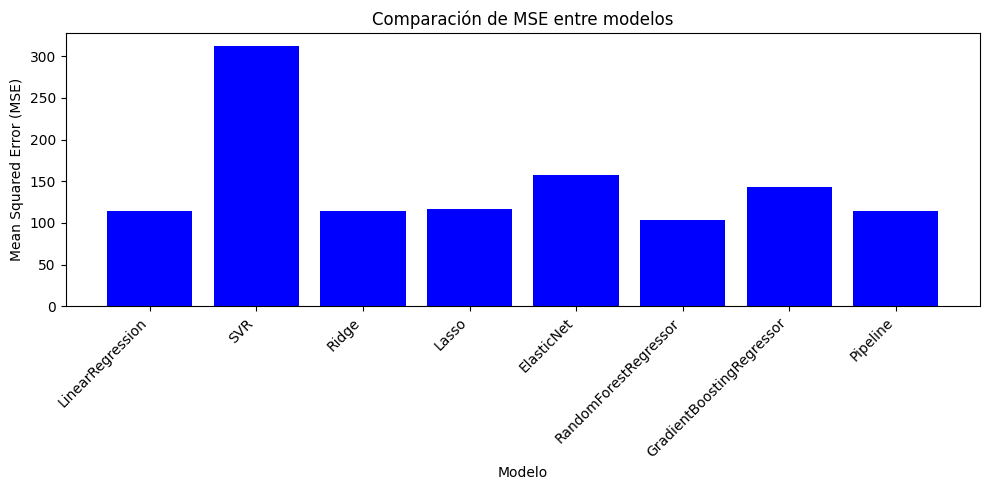

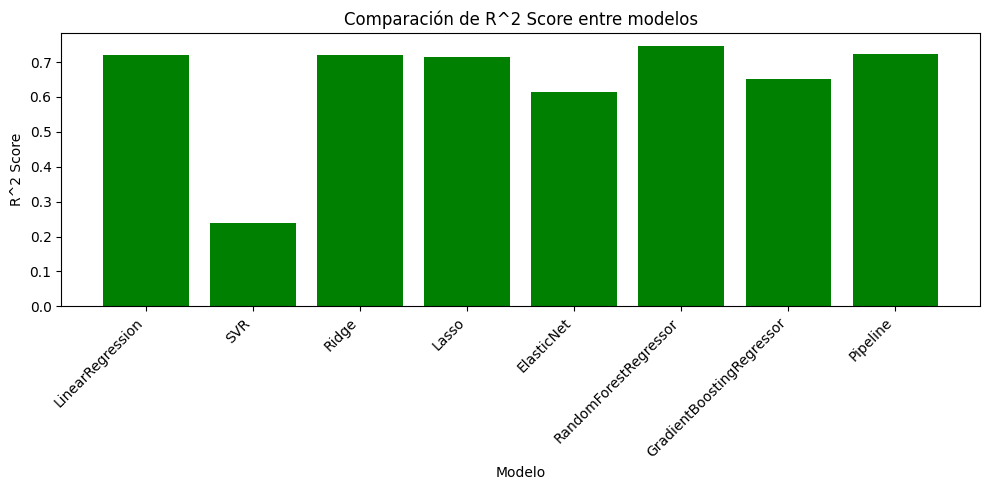

In [ ]:
import matplotlib.pyplot as plt

# Graficar el MSE
plt.figure(figsize=(10, 5))
plt.bar(model_names, mse_values, color='blue')
plt.title('Comparación de MSE entre modelos')
plt.xlabel('Modelo')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Graficar el R^2 Score
plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_values, color='green')
plt.title('Comparación de R^2 Score entre modelos')
plt.xlabel('Modelo')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

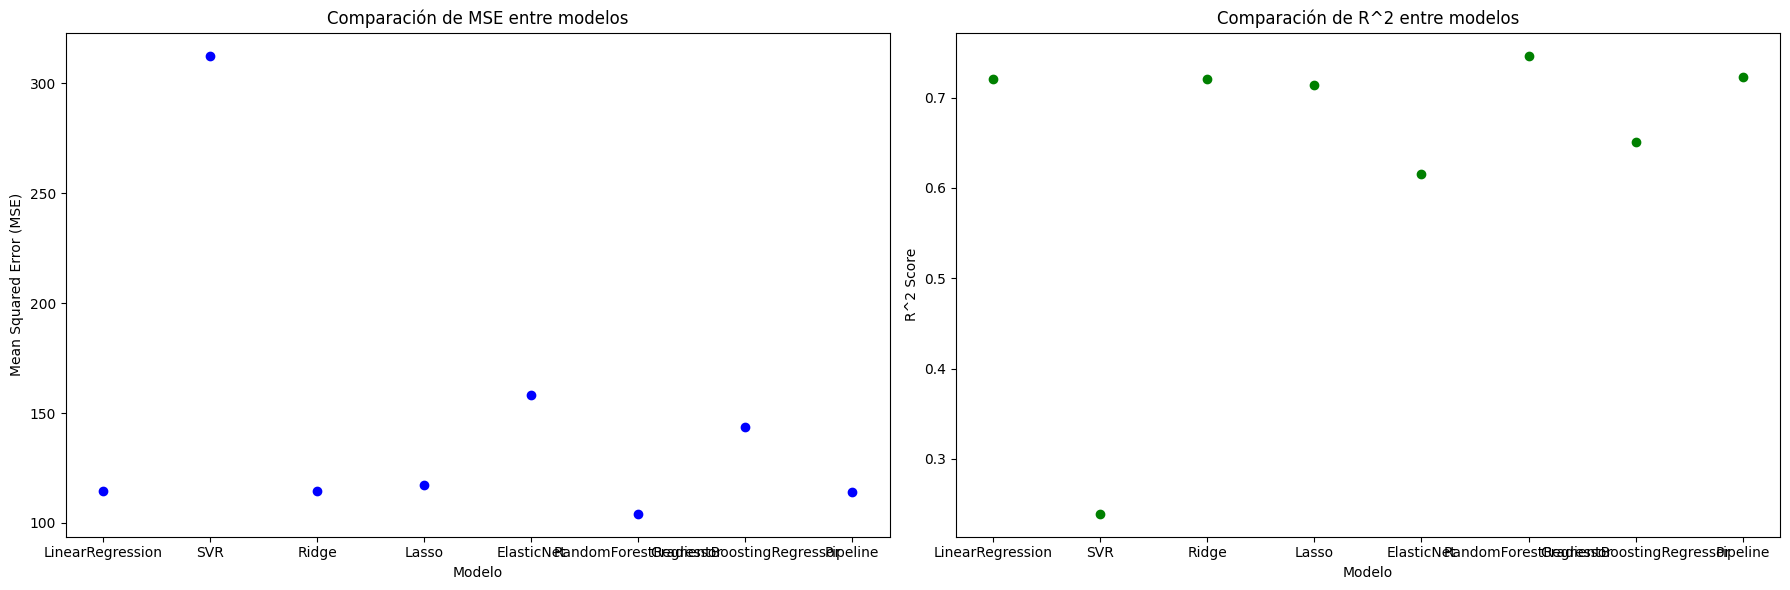

In [ ]:
import matplotlib.pyplot as plt

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico para Mean Squared Error (MSE)
axs[0].scatter(model_names, mse_values, color='blue')
axs[0].set_ylabel('Mean Squared Error (MSE)')
axs[0].set_xlabel('Modelo')
axs[0].set_title('Comparación de MSE entre modelos')


# Gráfico para R^2 Score
axs[1].scatter(model_names, r2_values, color='green')
axs[1].set_ylabel('R^2 Score')
axs[1].set_xlabel('Modelo')
axs[1].set_title('Comparación de R^2 entre modelos')


plt.tight_layout()
plt.show()

## Comparision

El Mean Squared Error (MSE) es una medida de la calidad de un modelo de regresión. Cuanto menor sea el valor del MSE, mejor será el modelo. En este caso, el MSE es de aproximadamente 50.58, lo que indica que este modelo tiene un error cuadrático medio relativamente bajo en comparación con el conjunto de datos.

El R^2 Score es una medida de qué tan bien se ajustan los valores predichos por el modelo a los valores reales. Un R^2 Score más cercano a 1 indica un mejor ajuste del modelo a los datos. En este caso, el R^2 Score es aproximadamente 0.885, lo que sugiere que el modelo explica aproximadamente el 88.5% de la variabilidad de la variable objetivo "Winnings", lo cual es un buen ajuste.

En resumen, este modelo parece tener un buen rendimiento en la tarea de predicción de las ganancias (Winnings) en comparación con el modelo anterior.

- En este caso, los resultados d elos modelos son mejores si se usa el dataset normalizado y sin outliers.
- Según el MSE, el mejor modelo es RandomForestRegressor, con un MSE de 103.25579714502692, el más bajo de todos los modelos probados
- Según el R2, el mejor modelo es de nuevo RandomForestRegressor, con un 0.7486043853667881. Es el que más se acerca a 1 y, por lo tanto, el modelo en que los valores predichos se ajustan más a los valores reales. 

## Selected model: RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Aplicar RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Imprimir resultados
print(f"Model: RandomForestRegressor")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"R^2 Score: {rf_r2}")
print(f"Prediction: {rf_y_pred}")
print()

Model: RandomForestRegressor
Mean Squared Error (MSE): 100.24464845993813
R^2 Score: 0.7559355918982399
Prediction: [-0.12630402 -0.0489548  -0.13472046 ...  0.6861138  -0.07866828
 -0.05423477]



## New manual Prediction

In [ ]:
selected_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
Winnings,22482.0,2.560486,19.390431,-536.217918,-0.119855,0.027845,0.958535,852.851090
Wager,22482.0,1.502843,8.368932,-0.156560,-0.129548,-0.025910,0.565601,389.499449
Purchase_Time_encoded,22482.0,0.673072,0.469101,0.000000,0.000000,1.000000,1.000000,1.000000
Sport_Group_encoded,22482.0,1.390979,1.176163,0.000000,1.000000,1.000000,1.000000,5.000000


### With created new random data

In [ ]:
import numpy as np

# Generar nuevas entradas aleatorias
new_data = []
for _ in range(5):  # Generar 5 nuevas entradas
    # Generar valores aleatorios para cada característica en el rango adecuado
    wager = np.random.uniform(0.1, 400)   # Valores de Wager en un rango aproximado al proporcionado
    purchase_time_encoded = np.random.choice([0, 1])  # Valores binarios para Purchase_Time_encoded
    sport_group_encoded = np.random.choice([0, 5])    # Valores binarios para Sport_Group_encoded
    
    # Agregar la nueva entrada a la lista
    new_data.append([wager, purchase_time_encoded, sport_group_encoded])

# Convertir la lista de nuevas entradas a un array numpy
new_data = np.array(new_data)

# Imprimir las nuevas entradas generadas
print("Nuevas entradas generadas aleatoriamente:")
print(new_data)

Nuevas entradas generadas aleatoriamente:
[[204.53837186   1.           0.        ]
 [ 89.85184872   0.           0.        ]
 [247.08934788   0.           5.        ]
 [240.08072881   0.           5.        ]
 [ 94.74731679   1.           5.        ]]


In [ ]:
new_data_scaled = scaler.transform(new_data)

# Realizar la predicción usando el modelo RandomForestRegressor
prediction = rf_model.predict(new_data_scaled)

# Imprimir la predicción
print("Nueva predicción manual:")
print("Predicción de Winnings:", prediction)

Nueva predicción manual:
Predicción de Winnings: [369.46589588 207.43512107 535.51318402 533.64118644 170.83645278]


c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



### With real data

In [ ]:
import numpy as np

# Datos de entrada para la predicción
new_data = np.array([
    [42.52, 1, 0],
    [2.5, 0, 0],
    [1, 1, 0],
    [4.33, 1, 0],
    [15.33, 1, 1],
    [75.65, 1, 1],
    [32.17, 0, 1],
    [171, 0, 1],
    [10, 1, 3],
    [23, 1, 3],
    [2, 1, 3],
    [2.1, 1, 3],
    [8.33, 0, 4],
    [58.04, 1, 4],
    [30, 0, 4],
    [0.55, 1, 4],
    [0.5, 1, 5],
    [100, 0, 5],
    [0.5, 1, 5],
    [169, 0, 5]
])

# Escalar los datos de entrada
new_data_scaled = scaler.transform(new_data)

# Realizar la predicción con el modelo RandomForestRegressor
predictions = rf_model.predict(new_data_scaled)

# Imprimir las predicciones
print("Predictions:")
for i, prediction in enumerate(predictions):
    print(f"Data {i+1}: {prediction}")

Predictions:
Data 1: 84.01019370460048
Data 2: 4.82987366177437
Data 3: 1.8403389830508474
Data 4: 9.570169491525428
Data 5: 30.894092009685224
Data 6: 93.64909200968525
Data 7: 21.493595641646507
Data 8: 364.0512469733656
Data 9: 21.52781736423383
Data 10: 51.33467312348668
Data 11: 0.4972054075867639
Data 12: -3.833038764941006
Data 13: 15.449213075060541
Data 14: 94.00791767554479
Data 15: 55.848256658595595
Data 16: 0.784049636803874
Data 17: 1.300738498789344
Data 18: 175.31730024213084
Data 19: 1.300738498789344
Data 20: 362.09999999999957


c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
# Agrupar los datos originales por deporte y por tiempo de compra, y calcular el total de apuestas y el total de ganancias
grouped_data = selected_columns.groupby(['Sport_Group_encoded', 'Purchase_Time_encoded']).agg({'Winnings': 'sum', 'Wager': 'count'}).reset_index()
grouped_data.columns = ['Sport_Group_encoded', 'Purchase_Time_encoded', 'Total_Winnings', 'Total_Bets']

# Utilizar las características agrupadas para hacer la predicción
X_grouped = grouped_data[['Sport_Group_encoded', 'Purchase_Time_encoded', 'Total_Bets']]
y_grouped = grouped_data['Total_Winnings']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_grouped, X_test_grouped, y_train_grouped, y_test_grouped = train_test_split(X_grouped, y_grouped, test_size=0.2, random_state=42)

# Escalar los datos de características
X_train_grouped_scaled = scaler.fit_transform(X_train_grouped)
X_test_grouped_scaled = scaler.transform(X_test_grouped)

# Entrenar el modelo
rf_model.fit(X_train_grouped_scaled, y_train_grouped)

# Realizar la predicción con el modelo entrenado
predictions_grouped = rf_model.predict(X_test_grouped_scaled)

# Imprimir las predicciones agrupadas por deporte y tiempo de compra
print("Predictions:")
for i, prediction in enumerate(predictions_grouped):
    print(f"Sport Group: {X_test_grouped.iloc[i]['Sport_Group_encoded']}, Purchase Time: {X_test_grouped.iloc[i]['Purchase_Time_encoded']}, Predicted Total Winnings: {prediction}")

Predictions:
Sport Group: 5, Purchase Time: 0, Predicted Total Winnings: 2316.9726513317232
Sport Group: 0, Purchase Time: 1, Predicted Total Winnings: 6626.68809927361
